<a href="https://cocl.us/DL0320EN_TOP_IMAGE">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/Top.png" width="750" alt="IBM 10TB Storage" />
</a>


<h1>Classifying European Money Denominations: Training a Pre-trained model  </h1>


<h2>Table of Contents</h2>


<p>In this lab, you will train the pre-trained models to classify the European currency. You will use the dataset object you created in the previous lab.</p>
<ul>
    <li><a href="#gen">Create Image Dataset Generator</a></li>
    <li><a href="#ques">Questions</a>
        <ol>
            <li><a href="q31">Question 3.1: Preparation</a></li>
            <li><a href="q32">Question 3.2: Train the model</a></li>
            <li><a href="q33">Question 3.3: Plot 5 Random Images with their predictions</a></li>
            <li><a href="q34">Question 3.4: Use the second model <code>VGG16</code> to do the prediction</a></li>
        </ol>
    </li>
    <li><a href="#save">Save the trained model</a></li>
</ul>

<p>Estimated Time Needed: <b>60 min</b></p>
<hr>


<h2>Preparation</h2>


<a href="https://cocl.us/DL0320EN_storage">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/ObjectStorage.png" width="750" alt="cognitive class" />
</a>


Download the datasets you needed for this lab.


In [ ]:
# You can comment out this box when you already have the dataset
# Step 1: Ctrl + A : Select all
# Step 2: Ctrl + / : Comment out all; if everything selected has been comment out alreaday, then uncomment all

# Download Training Dataset
!wget --quiet -O /resources/data/train_data_keras.tar.gz https://cocl.us/DL0320EN_TRAIN_TAR_KERAS
!tar -xzf /resources/data/train_data_keras.tar.gz -C /resources/data --exclude '.*'

# Download Validation Dataset
!wget --quiet -O /resources/data/validation_data_keras.tar.gz https://cocl.us/DL0320EN_VALID_TAR_KERAS
!tar -xzf /resources/data/validation_data_keras.tar.gz -C /resources/data --exclude '.*'

Import Keras Modules


In [24]:
# Keras Modules

import keras
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.models import Model

Import Non-Keras Modules 


In [25]:
# Non-Keras Modules

import os
from imageio import imread
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
import pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageFont
import random

<hr>


<h2 id="gen">Create Image Dataset Generator</h2>


In this section, you will need to generate the dataset by using what you learned from the previous labs.


The following code will store the paths of the image dataset.


In [26]:
# Store image dataset in the directory

train_data_dir = r'C:/Users/Laptop Zone/edx_ibm/capstone_project/data/train_data_keras'
validation_data_dir = r'C:/Users/Laptop Zone/edx_ibm/capstone_project/data/validation_data_keras'
classes = ['5', '10', '20', '50', '100', '200', '500']

Using <code>ImageDataGenerator().flow_from_directory()</code> to load the image from directory and generate the training dataset.


In [10]:
# Create the ImageDataGenerator for training dataset

train_generator = ImageDataGenerator().flow_from_directory(filenames=train_data_dir
                                                           , target_size=(224, 224)
                                                           , batch_size=10
                                                           , classes=classes
                                                           , seed=0
                                                           , shuffle=True)

NameError: name 'ImageDataGenerator' is not defined

Using <code>ImageDataGenerator().flow_from_directory()</code> to load the image from directory and generate the validation dataset.


In [28]:
# Create the ImageDataGenerator for validation dataset

valid_generator = ImageDataGenerator().flow_from_directory(validation_data_dir
                                                           , target_size=(224, 224)
                                                           , batch_size=5
                                                           , classes=classes
                                                           , seed=0
                                                           , shuffle=True)

Found 70 images belonging to 7 classes.


<hr>


<h2 id="ques">Questions</h2>


<h3 id="q31">Question 3.1: Preparation</h3><b>5 point</b>


<b>Step 1</b>: Load the pre-trained model <b>ResNet50</b>. Set <code>weights='imagenet'</code>


In [29]:
# Step 1: Load the pre-trained model ResNet50

base = ResNet50(weights='imagenet')

<b>Step 2:</b> The following lines of code sets the attribute <code>trainable</code> to <code>False</code>. As a result, the parameters in these layers will not be affected by training.


In [30]:
# Step2: Set parameters in pre-train model to False

for layer in base.layers:
    layer.trainalbe=False

<b>Step 3</b>: <b>ResNet50</b> is used to classify 1000 different objects; as a result, the last layer has 1000 outputs. However, you are going to classify 7 different classes, so you need to remove the last layer and replace with the new classification layer.


In [31]:
# Step 3: Replace the old classification layer with the new classification layer
sec_last_base= base.layers[-2].output
connected_model= Dense(len(classes), activation='softmax')(sec_last_base)
base_input= base.input
model=Model(base_input, connected_model)


Print out the model in order to show whether you get the correct answer.<br> <b>(Your peer reviewer is going to mark based on what you print here.)</b>


In [32]:
# Print the model (PLEASE DO NOT MODIFY THIS BOX)

model.summary()

Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
_______________________________________________________________________________________

<h3 id="q32">Question 3.2: Train the model</h3><b>5 points</b>


<b>Step 1</b>: Use the <code>model.compile()</code> to set the configuration for the model. Use the optimizer <b>Adam</b>, loss function <b>categorical_crossentropy</b> and <code>metrics = ['accuracy']</code> as the parameters for training the model.


In [33]:
# Step 1: Use model.compile() to set the configuration

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<b>Step 2: </b>Train the model with 20 epochs.


In [35]:
# Step 2: Train the model

history = model.fit_generator(train_generator
                              ,validation_data=valid_generator
                              ,steps_per_epoch= train_generator.n//train_generator.batch_size
                              ,epochs=20
                              )

Epoch 1/20
7/7 [==============================] - 81s 12s/step - loss: 0.3992 - accuracy: 0.9000 - val_loss: 1817.7437 - val_accuracy: 0.1429
Epoch 2/20
7/7 [==============================] - 75s 11s/step - loss: 0.6824 - accuracy: 0.8857 - val_loss: 14358.4951 - val_accuracy: 0.1429
Epoch 3/20
7/7 [==============================] - 76s 11s/step - loss: 0.1910 - accuracy: 0.9714 - val_loss: 11311.4648 - val_accuracy: 0.1429
Epoch 4/20
7/7 [==============================] - 79s 11s/step - loss: 0.5734 - accuracy: 0.9286 - val_loss: 216168.2812 - val_accuracy: 0.1429
Epoch 5/20
7/7 [==============================] - 83s 12s/step - loss: 0.3173 - accuracy: 0.9857 - val_loss: 1911073.2500 - val_accuracy: 0.1429
Epoch 6/20
7/7 [==============================] - 79s 11s/step - loss: 0.9488 - accuracy: 0.9143 - val_loss: 1903399.3750 - val_accuracy: 0.1429
Epoch 7/20
7/7 [==============================] - 77s 11s/step - loss: 0.4349 - accuracy: 0.9000 - val_loss: 255457.2031 - val_accuracy: 0

The information of loss and accuarcy for both training and validation is in <code>model.history.history</code>. Get the training history, and store the history into <code>train_history</code>.


In [41]:
# Get the training history

train_history = model.history.history

<b>Step 3</b>: Plot out the result of loss for both training and validation.<br> <b>(Your peer reviewer is going to mark based on what you plot here.)</b>


In [42]:
# Step 3: Plot the loss for both training and validation

loss=train_history['loss']
val_loss=train_history['val_loss']

<b>Step 4</b>: Plot out the result of accuracy for both training and validation.<br> <b>(Your peer reviewer is going to mark based on what you plot here.)</b>


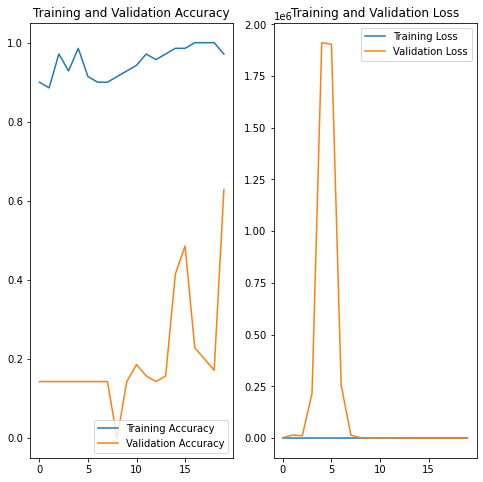

In [45]:
# Step 4: Plot the accuracy for both training and validation
acc=train_history['accuracy']
val_acc=train_history['val_accuracy']
epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


<h3 id="q33">Question 3.3: Plot 5 Random Images with their predictions</h3><b>3 points</b>


Use the <b>validation_dataset</b> to see whether model can predict. (You will use the <b>test_dataset</b> in the future lab. Use the <b>validation_dataset</b> for now.) Notice that you need to set the <code>shuffle</code> to <code>False</code>, so the the order of predictions will be the same as the file loading order.


In [39]:
# Generate test dataset and generate the prediction results

test_valid_generator = ImageDataGenerator().flow_from_directory(validation_data_dir
                                                           , target_size=(224, 224)
                                                           , batch_size=5
                                                           , classes=classes
                                                           , seed=0
                                                           , shuffle=False)

Found 70 images belonging to 7 classes.


Create a test dataset using validation data. Plot 5 random images which index is in the <code>numbers</code> list. Also print the predicted label and print a string indicate whether it has been correctly classified or mis-classified.<br> <b>(Your peer reviewer is going to mark based on what you plot here.)</b>

<p>Steps:</p>
<ol>
    <li>Use <code>MODEL.predict_generator()</code> to do the prediction</li>
    <li>Use <code>np.argmax()</code> to find the location of the maximum value</li>
    <li>Get the class labels from <code>train_generator</code> using <code>train_generator.filenames</code></li>
    <li>Get the class indices from the previous step using <code>train_generator.class_indices</code></li>
    <li>Match classes with labels like <code>[0, 1, 2, 3, 4, 5, 6] -> ['5', '10', '20', '50', '100', '200', '500']</code></li>
    <li>Get the true label by analysis folder name on the image resource path. Notice the <code>test_valid_genertor.filename</code> order is the same as the predicted order as you did not shuffle the dataset.</li>
    <li>Compare, plot and print the result</li>
</ol>


In [9]:
random.seed(0)
numbers = [random.randint(0, 69) for i in range(0, 5)]

# Type your code here
actual = test_valid_generator.classes
# print('actual:',actual) 

# print('train_generator.filenames:',train_generator.filenames) 
# print('train_generator.class_indices:',train_generator.class_indices) 

predict = np.argmax(model.predict_generator(test_valid_generator),axis =1)
# print('predict:', predict)



for num in numbers:
   
    for key, value in train_generator.filenames.items():
        if value == predict[num]:
            key_value = key
    
    plt.imshow(test_valid_generator[num // 5][0][num % 5].astype(np.uint8), aspect='auto')
    plt.show()
    
    if predict[num] == actual[num] :
        print ('predicted: ${} Correctly Classified' .format(key_value))

    else:
        print ('predicted: ${} Mis-classified'.format(key_value))


NameError: name 'random' is not defined

<h3 id="q34">Question 3.4: Use the second model <code>VGG16</code> to do the prediction</h3><b>5 points</b>


Repeat the steps in Question 3.1, 3.2 to predict the result using <code>VGG16</code> model. Then, print out the last validation accuracy.


<p>Steps:</p>
<ol>
    <li>Load the pre-trained model VGG16</li>
    <li>Replace the last classification layer with only 7 classes</li>
    <li>Set the configuration (parameters) using <code>MODEL.compile()</code></li>
    <li>Train the model</li>
    <li>Print the last validation accuracy</li>
</ol>


Hint:

<ol>
    <li>Use optimizer <code>Adam</code></li>
    <li>Use loss function <code>categorical_crossentropy</code></li>
    <li>Epoches = 5</li>
</ol>


You are welcome to try any pattern of setting and find out the best result. Please name the model variable as <code>model_vgg</code>.<br> <b>(Your peer reviewer is going to mark based on what you print here.)</b>


In [ ]:
# Use VGG16 to train the model and print out the last validation accuracy.

# Type your code here

<h2 id="#save">Save the trained model</h2>


Save the trained model for the following chapters


In [ ]:
# Save the model

model.save("resnet50_keras.pt")
model_vgg.save("vgg16_keras.pt")

<a href="https://cocl.us/DLO0320EN_notebook_bott">
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DL0320EN/Assets/Images/Bottom.png" width="750" alt="cognitive class" />
</a>


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


Other contributors: <a href="https://www.linkedin.com/in/michelleccarey/">Michelle Carey</a>, <a href="www.linkedin.com/in/jiahui-mavis-zhou-a4537814a">Mavis Zhou</a>, <a href="https://www.linkedin.com/in/yi-leng-yao-84451275/">Yi Leng Yao</a>


<hr>


Copyright © 2018 <a href="cognitiveclass.ai?utm_source=bducopyrightlink&utm_medium=dswb&utm_campaign=bdu">cognitiveclass.ai</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.
